In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,classification_report
from sklearn.preprocessing import StandardScaler

In [65]:
# in this project we will be importing the time_series_forecasting project

df = pd.read_csv(r"C:\Users\Vaibhav\OneDrive\Documents\FolderPython\Data_Science\basic_lstm_project\time_series_forecasting\monthly_milk_production.csv",index_col="Date",parse_dates=True)
df.index.freq='MS'
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

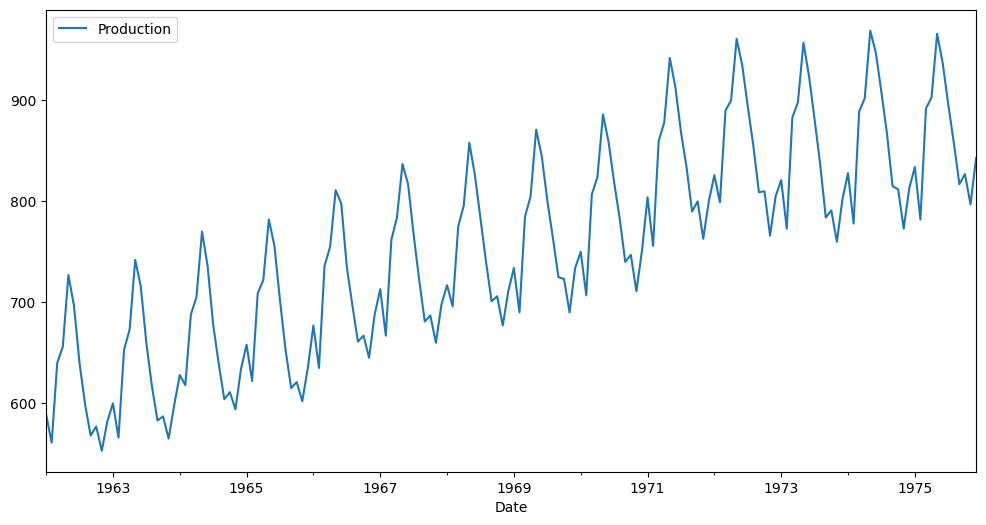

In [66]:
df.plot(figsize=(12,6))

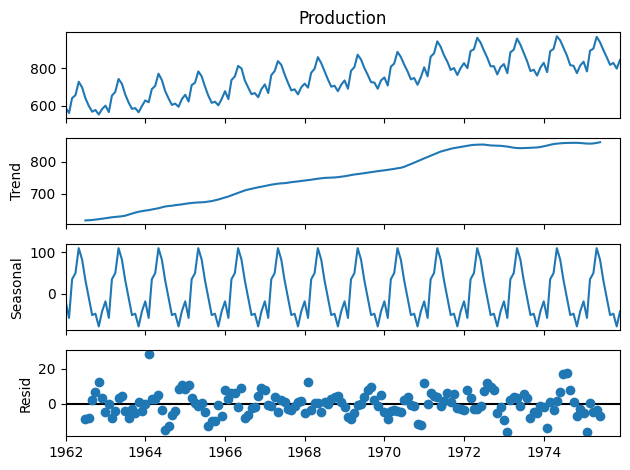

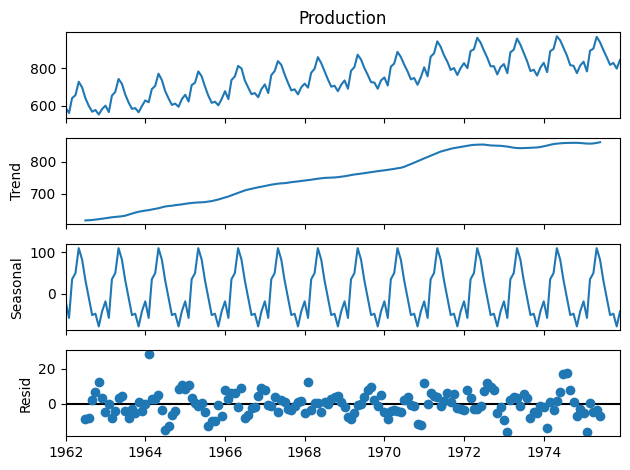

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose 
# this will decompose different parts of the timeseries

results = seasonal_decompose(df['Production'])
results.plot()

In [68]:
len(df)

168

In [69]:
# they can work on non-stationary data but the stationary data works better

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train = df.iloc[:156]
test = df.iloc[156:]

# scaler = StandardScaler()
scaled = MinMaxScaler()

# df.head(),df.tail()

scaled_train = scaled.fit_transform(train)
scaled_test = scaled.transform(test)

# it takes the n before inputs and outputs the next one


In [70]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

# here the first 3 elements predict the next elements

X,y = generator[1]

print(f"Given the array:\n {X.flatten()}")
print(f"Predict this y: \n {y}")

Given the array:
 [0.01923077 0.20913462 0.24759615]
Predict this y: 
 [[0.41826923]]


In [71]:
X.shape # 1 row , 3 columns and the last one is the number of features

(1, 3, 1)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.summary()

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.fit(generator,epochs=50)

Epoch 1/50
118/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1581

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1389
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0233
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0213
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0138 
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0167 
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132
Epoch 10/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132
Epoch 11/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115
Epoch 12/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0106  
Epoch 13/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0104  
Epoch 14/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102
Epoch 15/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 

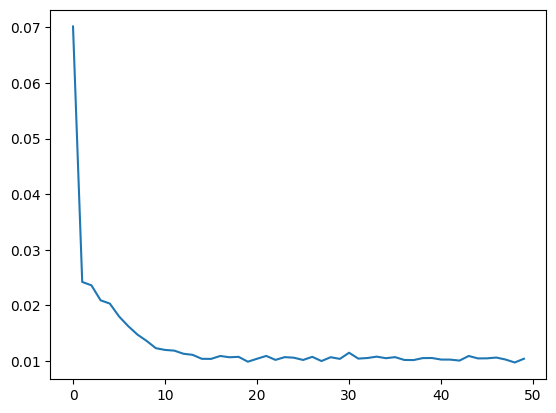

In [74]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [75]:
last_train_batch = scaled_train[-3:]
last_train_batch = last_train_batch.reshape((1,n_input,n_features))
model.predict(last_train_batch)
print(model.predict(last_train_batch))
print(scaled_test[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.5775022]]
[0.67548077]


In [78]:
test_predictions = []
# error_log = []
n_input = 3

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    # error_val = current_pred - scaler_test[i]
    # error_log.append(error_val)
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [79]:
test_predictions

[array([0.5775022], dtype=float32),
 array([0.5737912], dtype=float32),
 array([0.5460213], dtype=float32),
 array([0.53088534], dtype=float32),
 array([0.5165574], dtype=float32),
 array([0.5087664], dtype=float32),
 array([0.50432175], dtype=float32),
 array([0.5030093], dtype=float32),
 array([0.5033153], dtype=float32),
 array([0.50452346], dtype=float32),
 array([0.505966], dtype=float32),
 array([0.5073142], dtype=float32)]

In [80]:
test['Predictions'] = scaled.inverse_transform(test_predictions)

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_22568\2917318113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = scaled.inverse_transform(test_predictions)


<Axes: xlabel='Date'>

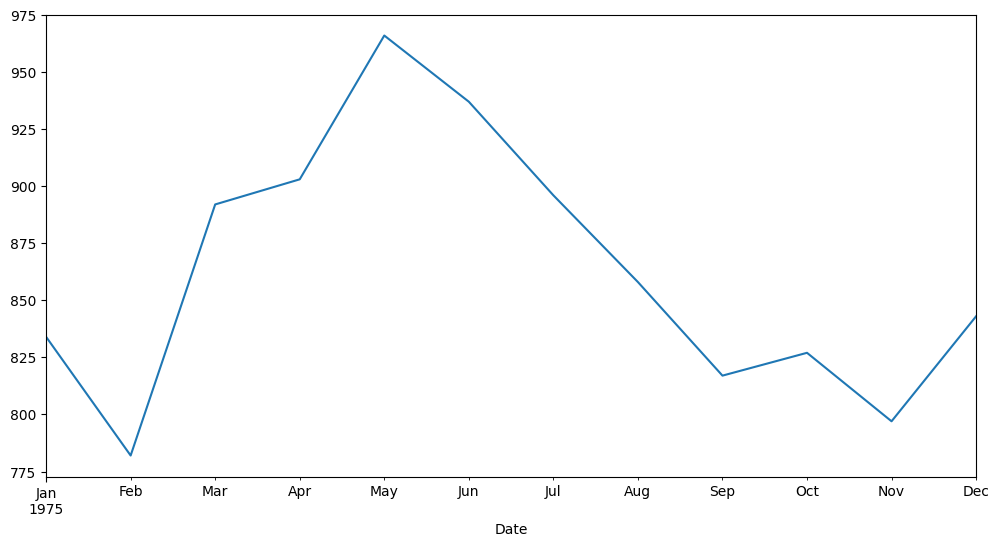

In [81]:
test['Production'].plot(figsize=(12,6))

<Axes: xlabel='Date'>

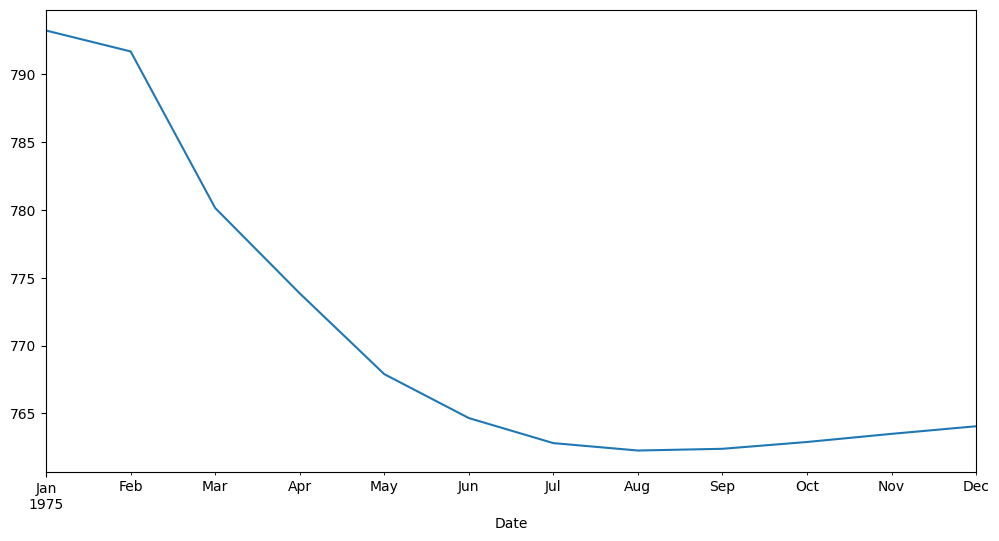

In [82]:
test['Predictions'].plot(figsize=(12,6))

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

108.49881766649392


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

test_predictions = []
n_input = 3

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.roll(current_batch, -1, axis=1)
    current_batch[:, -1, :] = current_pred

test_predictions = np.array(test_predictions)
test_predictions = scaled.inverse_transform(test_predictions.reshape(-1, 1)).reshape(-1)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['Production'], test_predictions))
print(rmse)

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
315.6745714863401
